In [6]:
import numpy as np
import pandas as pd

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
# Load dataset
bank_df = pd.read_csv('/content/drive/MyDrive/pandas/bank .csv')

# Inspect the dataset
print(bank_df.info())

# Identify columns with dtype=object
object_columns = bank_df.select_dtypes(include=['object'])
print(f"Columns with dtype=object: {object_columns.columns.tolist()}")
for col in object_columns.columns:
    print(f"Unique values in '{col}': {bank_df[col].unique()}")

# Check for null values
print(bank_df.isnull().sum())

# Drop object columns and save new file
bank_numeric = bank_df.drop(columns=object_columns.columns)
bank_numeric.to_csv('banknumericdata.csv', index=False)

# Reload and calculate summary statistics
numeric_df = pd.read_csv('banknumericdata.csv')
print(numeric_df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None
Columns with dtype=object: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'cont

In [9]:
# Load dataset
medical_df = pd.read_csv('/content/drive/MyDrive/pandas/medical_students_dataset.csv')

# Inspect for missing values
print(medical_df.info())
missing_columns = medical_df.isnull().sum()
print(f"Columns with missing values:\n{missing_columns[missing_columns > 0]}")

# Impute missing values
# Example: Using mean for numerical columns
for col in missing_columns.index:
    if medical_df[col].dtype in ['int64', 'float64']:
        medical_df[col].fillna(medical_df[col].mean(), inplace=True)
    elif medical_df[col].dtype == 'object':
        medical_df[col].fillna(medical_df[col].mode()[0], inplace=True)

# Check for duplicates
print(f"Duplicate rows: {medical_df.duplicated().sum()}")
medical_df = medical_df.drop_duplicates()

# Save cleaned data
medical_df.to_csv('medical_student_cleaned.csv', index=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Student ID      180000 non-null  float64
 1   Age             180000 non-null  float64
 2   Gender          180000 non-null  object 
 3   Height          180000 non-null  float64
 4   Weight          180000 non-null  float64
 5   Blood Type      180000 non-null  object 
 6   BMI             180000 non-null  float64
 7   Temperature     180000 non-null  float64
 8   Heart Rate      180000 non-null  float64
 9   Blood Pressure  180000 non-null  float64
 10  Cholesterol     180000 non-null  float64
 11  Diabetes        180000 non-null  object 
 12  Smoking         180000 non-null  object 
dtypes: float64(9), object(4)
memory usage: 19.8+ MB
None
Columns with missing values:
Student ID        20000
Age               20000
Gender            20000
Height            20000
Weight          

<ipython-input-9-3d7d6214051e>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  medical_df[col].fillna(medical_df[col].mean(), inplace=True)
<ipython-input-9-3d7d6214051e>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

Duplicate rows: 12572


mean       84.154687
median     60.287500
max       512.329200
min         0.000000
Name: Fare, dtype: float64
Null values in 'Age': 177
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin  Embarked_C  Embarked_Q  Embarked_S  
0      0         A/5 21171   7.2500   NaN       False       False        True  
1      0          PC 17

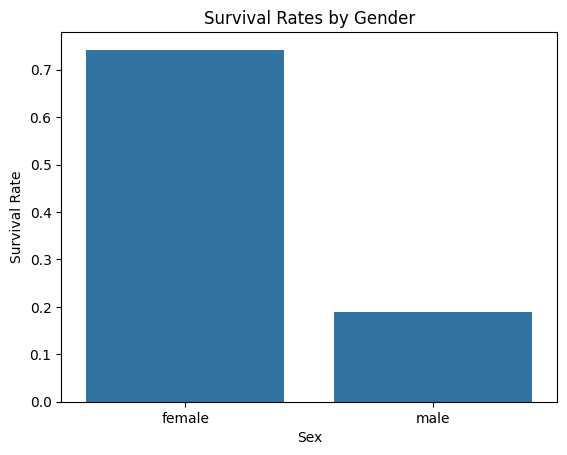

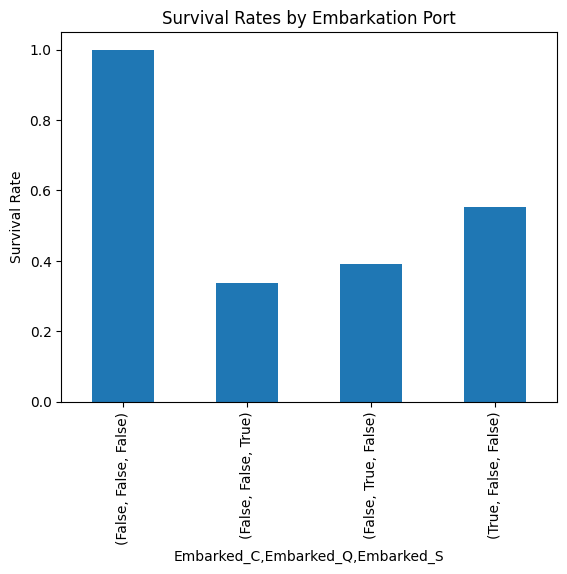

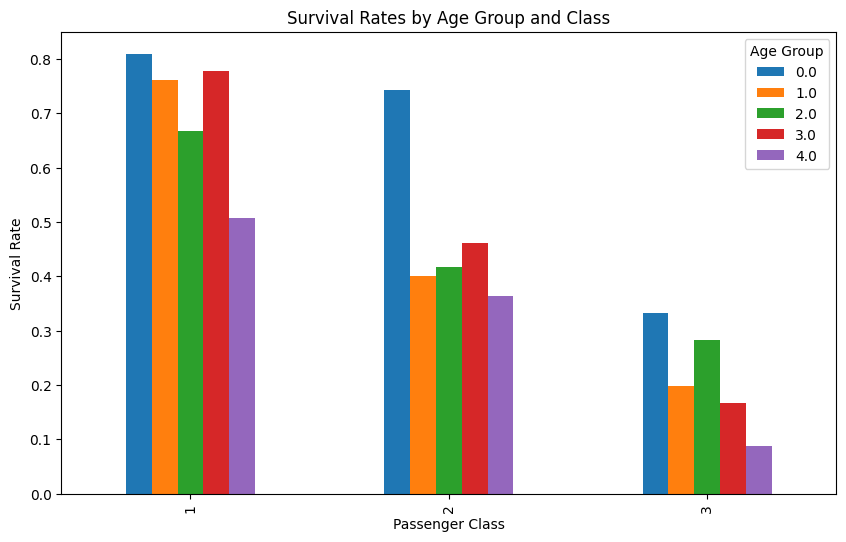

In [10]:
titanic_df = pd.read_csv('/content/drive/MyDrive/pandas/Titanic-Dataset.csv')

# Subset relevant columns
subset_df = titanic_df[['Name', 'Pclass', 'Sex', 'Age', 'Fare', 'Survived']]
first_class_df = subset_df[subset_df['Pclass'] == 1]

# Compute statistics for 'Fare'
fare_stats = first_class_df['Fare'].agg(['mean', 'median', 'max', 'min'])
print(fare_stats)

# Check null values in 'Age'
print(f"Null values in 'Age': {subset_df['Age'].isnull().sum()}")

# Drop rows with null 'Age'
subset_df = subset_df.dropna(subset=['Age'])

# One-hot encoding for 'Embarked'
encoded_embarked = pd.get_dummies(titanic_df['Embarked'], prefix='Embarked')

# Add to original DataFrame
titanic_df = pd.concat([titanic_df, encoded_embarked], axis=1)
titanic_df.drop(columns=['Embarked'], inplace=True)

print(titanic_df.head())

import matplotlib.pyplot as plt
import seaborn as sns

# Compare survival rates by gender
survival_rates = titanic_df.groupby('Sex')['Survived'].mean()
print(survival_rates)

# Visualization
sns.barplot(x=survival_rates.index, y=survival_rates.values)
plt.title('Survival Rates by Gender')
plt.ylabel('Survival Rate')
plt.show()

# Survival rates by embarkation port
embark_survival = titanic_df.groupby(['Embarked_C', 'Embarked_Q', 'Embarked_S'])['Survived'].mean()
embark_survival.plot(kind='bar')
plt.title('Survival Rates by Embarkation Port')
plt.ylabel('Survival Rate')
plt.show()

# Divide Age into quantiles
titanic_df['AgeGroup'] = pd.qcut(titanic_df['Age'], 5, labels=False)

# Survival rates by age group and class
age_class_survival = titanic_df.groupby(['Pclass', 'AgeGroup'])['Survived'].mean()

# Visualization
age_class_survival.unstack().plot(kind='bar', figsize=(10, 6))
plt.title('Survival Rates by Age Group and Class')
plt.ylabel('Survival Rate')
plt.xlabel('Passenger Class')
plt.legend(title='Age Group')
plt.show()
